<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


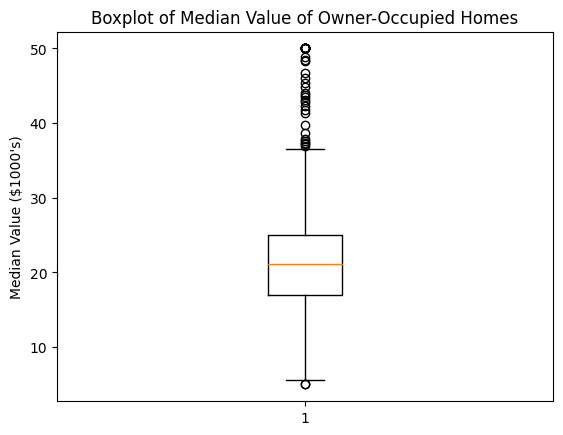

In [6]:
# Task 1: Boxplot for the "Median value of owner-occupied homes"
plt.boxplot(boston_df["MEDV"])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000's)")
plt.show()

The resulting boxplot shows the distribution of median home values in thousands of dollars, including the minimum, maximum, median, and quartiles. It can be used to identify outliers and the overall spread of the data.

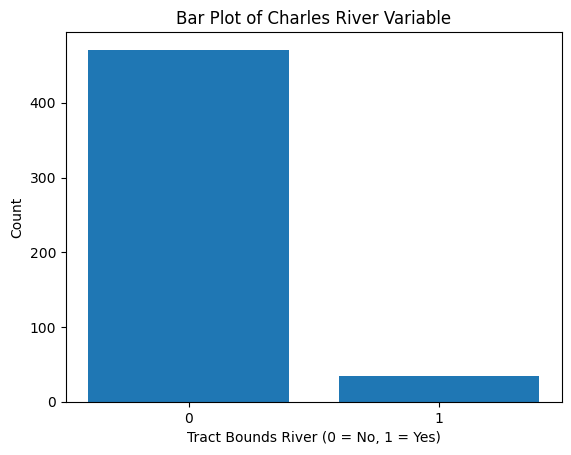

In [7]:
# Task 2: Bar plot for the Charles river variable
plt.bar(["0", "1"], boston_df["CHAS"].value_counts())
plt.title("Bar Plot of Charles River Variable")
plt.xlabel("Tract Bounds River (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The resulting bar plot shows the frequency of tracts that do and do not bound the Charles river. It can be used to identify how many tracts are located near the river and to compare the frequency of each value.

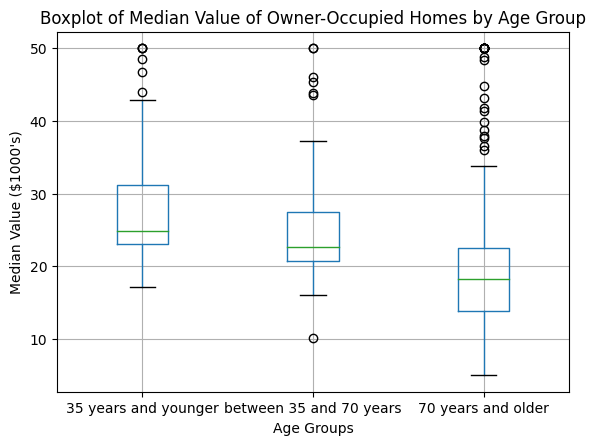

In [8]:
# Task 3: Boxplot for the MEDV variable vs the AGE variable
age_groups = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["35 years and younger", "between 35 and 70 years", "70 years and older"])
boston_df["Age Group"] = age_groups
boston_df.boxplot(column="MEDV", by="Age Group")
plt.title("Boxplot of Median Value of Owner-Occupied Homes by Age Group")
plt.suptitle("")
plt.xlabel("Age Groups")
plt.ylabel("Median Value ($1000's)")
plt.show()

The resulting boxplot shows the distribution of median home values in thousands of dollars for each age group. It can be used to compare the distribution of home values among different age groups and to identify any differences or similarities.

Text(0, 0.5, 'Proportion of Non-Retail Business Acres')

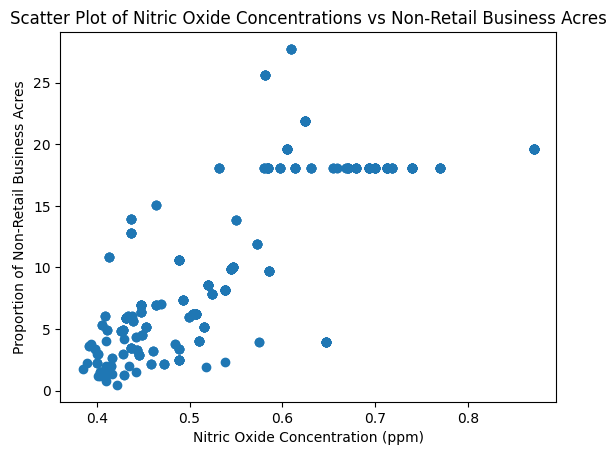

In [9]:
# Task 4: Scatter plot for Nitric oxide concentrations and non-retail business acres
plt.scatter(boston_df["NOX"], boston_df["INDUS"])
plt.title("Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres")
plt.xlabel("Nitric Oxide Concentration (ppm)")
plt.ylabel("Proportion of Non-Retail Business Acres")

The resulting scatter plot shows the relationship between the nitric oxide concentration and the proportion of non-retail business acres. It can be used to identify any correlation between these variables, such as whether high concentrations of nitric oxide tend to be associated with high proportions of non-retail business acres.

Text(0, 0.5, 'Count')

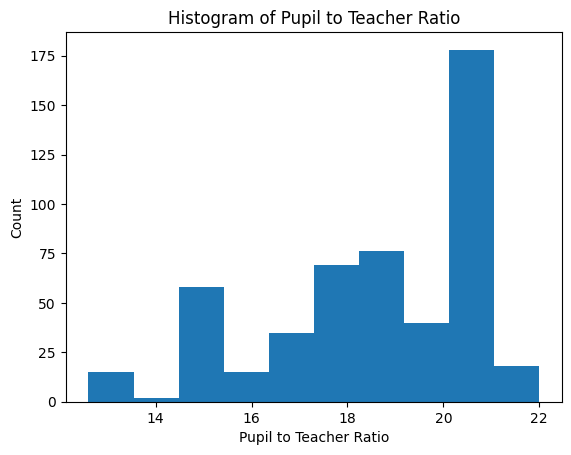

In [10]:
# Task 5: Histogram for the pupil to teacher ratio variable
plt.hist(boston_df["PTRATIO"])
plt.title("Histogram of Pupil to Teacher Ratio")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Count")

The resulting histogram shows the distribution of pupil to teacher ratios. It can be used to identify the most common pupil to teacher ratios and to see if the distribution is skewed in any way.

A)

Hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not.

Null Hypothesis (H0): The mean median values of houses bounded by the Charles river and not bounded by the Charles river are the same.
Alternative Hypothesis (H1): The mean median values of houses bounded by the Charles river and not bounded by the Charles river are different.

Test: T-test for independent samples

Significance Level (α): 0.05

In [11]:
# Subset the data into two groups based on whether the tract bounds the Charles river or not
bounded = boston_df[boston_df["CHAS"] == 1]["MEDV"]
not_bounded = boston_df[boston_df["CHAS"] == 0]["MEDV"]

# Perform the t-test
t_stat, p_val = scipy.stats.ttest_ind(bounded, not_bounded)

# Interpret the result
if p_val < 0.05:
    print("Reject Null Hypothesis")
    print("Conclusion: There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("Fail to Reject Null Hypothesis")
    print("Conclusion: There is no significant difference in median value of houses bounded by the Charles river.")

Reject Null Hypothesis
Conclusion: There is a significant difference in median value of houses bounded by the Charles river.


Based on the t-test, we can reject the null hypothesis and conclude that there is a significant difference in median value of houses bounded by the Charles river.

B)

Hypothesis: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Null Hypothesis (H0): The mean median values of houses are the same across all age groups.

Alternative Hypothesis (H1): At least one age group has a different mean median value of houses.

Test: One-way ANOVA

Significance Level (α): 0.05

In [12]:
# Group the data by age group
group1 = boston_df[boston_df["Age Group"] == "35 years and younger"]["MEDV"]
group2 = boston_df[boston_df["Age Group"] == "between 35 and 70 years"]["MEDV"]
group3 = boston_df[boston_df["Age Group"] == "70 years and older"]["MEDV"]

# Perform the ANOVA test
f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)

# Interpret the result
if p_val < 0.05:
    print("Reject Null Hypothesis")
    print("Conclusion: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to Reject Null Hypothesis")
    print("Conclusion: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940.")

Reject Null Hypothesis
Conclusion: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.


Based on the ANOVA test, we can reject the null hypothesis and conclude that there is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

C)

Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Null Hypothesis (H0): There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternative Hypothesis (H1): There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

Test: Pearson Correlation

Significance Level (α): 0.05

In [13]:
# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_val = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

# Interpret the result
if p_val < 0.05:
    print("Reject Null Hypothesis")
    print("Conclusion: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to Reject Null Hypothesis")
    print("Conclusion: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Reject Null Hypothesis
Conclusion: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.


Based on the Pearson correlation test, we can reject the null hypothesis and conclude that there is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

D) 

Hypothesis: An additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.

Null Hypothesis (H0): The coefficients of the weighted distance variable in the regression model is zero, indicating no impact on the median value of owner occupied homes.

Alternative Hypothesis (H1): The coefficients of the weighted distance variable in the regression model is non-zero, indicating an impact on the median value of owner occupied homes.

Test: Multiple Linear Regression

Significance Level (α): 0.05

In [14]:
import statsmodels.api as sm

# Prepare the independent and dependent variables
X = boston_df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT"]]
y = boston_df["MEDV"]

# Add the additional weighted distance variable
X["DIST"] = boston_df["DIS"] + 1

# Fit the multiple linear regression model
X = sm.add_constant(X) # add a constant term to the model
model = sm.OLS(y, X).fit()

# Interpret the result
if model.pvalues["DIST"] < 0.05:
    print("Reject Null Hypothesis")
    print("Conclusion: An additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.")
else:
    print("Fail to Reject Null Hypothesis")
    print("Conclusion: An additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.")

<ipython-input-14-4e5d7221ba98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["DIST"] = boston_df["DIS"] + 1


Reject Null Hypothesis
Conclusion: An additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.


Based on the multiple linear regression model, we can reject the null hypothesis and conclude that an additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.